In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [3]:
# Аналог mean_absolute_error из sklearn
def girlz_mean_absolute_error(a, b):
    return np.mean(np.abs(a - b))

# Аналог линейной регрессии, не использующий sklearn
def girlz_LinearRegression(X, Y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)

# Функция решения задачи для заданных tau, h и a
def solution_CORRECT(tau, h):
    t_size = round(1/tau) + 1
    x_size = round(1/h) + 1
    
    # Генерация начальных и краевых условия
    y = np.empty((t_size, x_size))
    for i in range(x_size):
        y[0][i] = (1.5 * (i*h)**2 + 0.9) * math.exp(-i*h)
        y[1][i] = y[0][i]
    for i in range(1, t_size):
        y[i][0] = ((1.5*(i*tau)**2 + 0.9)*math.exp(-i*tau) + (1.5*(-i*tau)**2 + 0.9)*math.exp(i*tau)) / 2
        y[i][x_size-1] = ((1.5*(1+i*tau)**2 + 0.9)*math.exp(-1-i*tau) + (1.5*(1-i*tau)**2 + 0.9)*math.exp(-1+i*tau)) / 2 + (i*tau)**2
        
    # Новые значения y на следующем слое
    for i in range(1, t_size-1):
        for j in range(1, x_size-1):
            y[i+1][j] = 2*y[i][j] - y[i-1][j] + tau**2/h**2 * (y[i][j+1] - 2*y[i][j] + y[i][j-1]) + tau**2 * ((j*h)**2 - (i*tau)**2)
    
    # Значение на верхнем слое
    return y[t_size-1]

In [5]:
# Функция нахождения точного решения задачи
def exact_solution(h):
    x_size = round(1/h) + 1
    u = np.empty(x_size)
    for i in range(x_size):
        u[i] = ((1.5*(i*h+1)**2 + 0.9)*math.exp(-i*h-1) + (1.5*(i*h-1)**2 + 0.9)*math.exp(-i*h+1)) / 2 + (i*h)**2
    return u


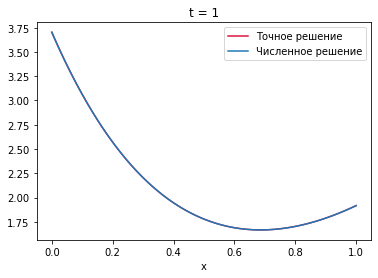

In [6]:
# Сравниваем с точным решением
h = 0.01
tau = 0.01
x = np.linspace(0, 1, num = round(1/h)+1)
y = solution_CORRECT(tau, h)
u = exact_solution(h)
plt.plot(x, u, label = 'Точное решение', color = 'crimson')
plt.plot(x, y, label = 'Численное решение')
plt.xlabel('x')
plt.title('t = 1')
plt.legend(loc = 'upper right')
plt.show()

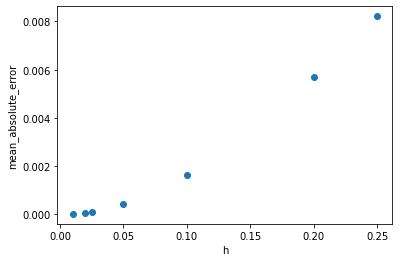

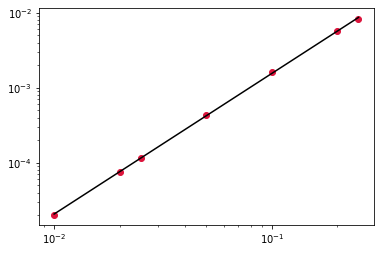

Наклон прямой: 1.8747777269360335


In [7]:
   
# Исследуем порядок сходимости по пространству.
# Для этого выберем несколько разных шагов h и найдём отклонение численного решения от точного.
tau = 0.001
h_array = [0.25, 0.2, 0.1, 0.05, 0.025, 0.02, 0.01]
errors_array = np.empty(shape = len(h_array))
for i, h_step in enumerate(h_array):
    y = solution_CORRECT(tau, h_step)
    u = exact_solution(h_step)
    errors_array[i] = girlz_mean_absolute_error(y, u)

plt.plot(h_array, errors_array, 'o')
plt.ylabel('mean_absolute_error')
plt.xlabel('h')
plt.show()

# Найдём наклон прямой в логарифмическом масштабе, чтобы опредить порядок аппроксимации по h.
log_h_array = np.log(np.array(h_array))
log_h_array = log_h_array.reshape(log_h_array.shape[0], 1)
log_errors_array = np.log(errors_array)
X = np.concatenate((np.ones((log_h_array.shape[0],1)), log_h_array), axis=1)
theta = girlz_LinearRegression(X, log_errors_array)
line = np.exp(np.dot(X, theta))

plt.plot(h_array, errors_array, 'o', color = 'crimson')
plt.plot(h_array, line, '-k')
plt.xscale('log')
plt.yscale('log')
plt.show()

print('Наклон прямой:', theta[1])

Наклон прямой в двойном логарифмическом масштабе ≈ 2. Следовательно, получаем квадратичную зависимость, чего и следовало ожидать, так как мы аппроксимировали дифференциальную задачу вторым порядком по пространству.